# Harsh Bansal
# LGMVIP-Datascience Intern May 2022
# Task-1 - IrisFlowersClassification

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix



In [2]:
# Load the iris dataset
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [3]:
df = pd.read_csv('Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['Target']=le.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [12]:
df.shape

(150, 7)

In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

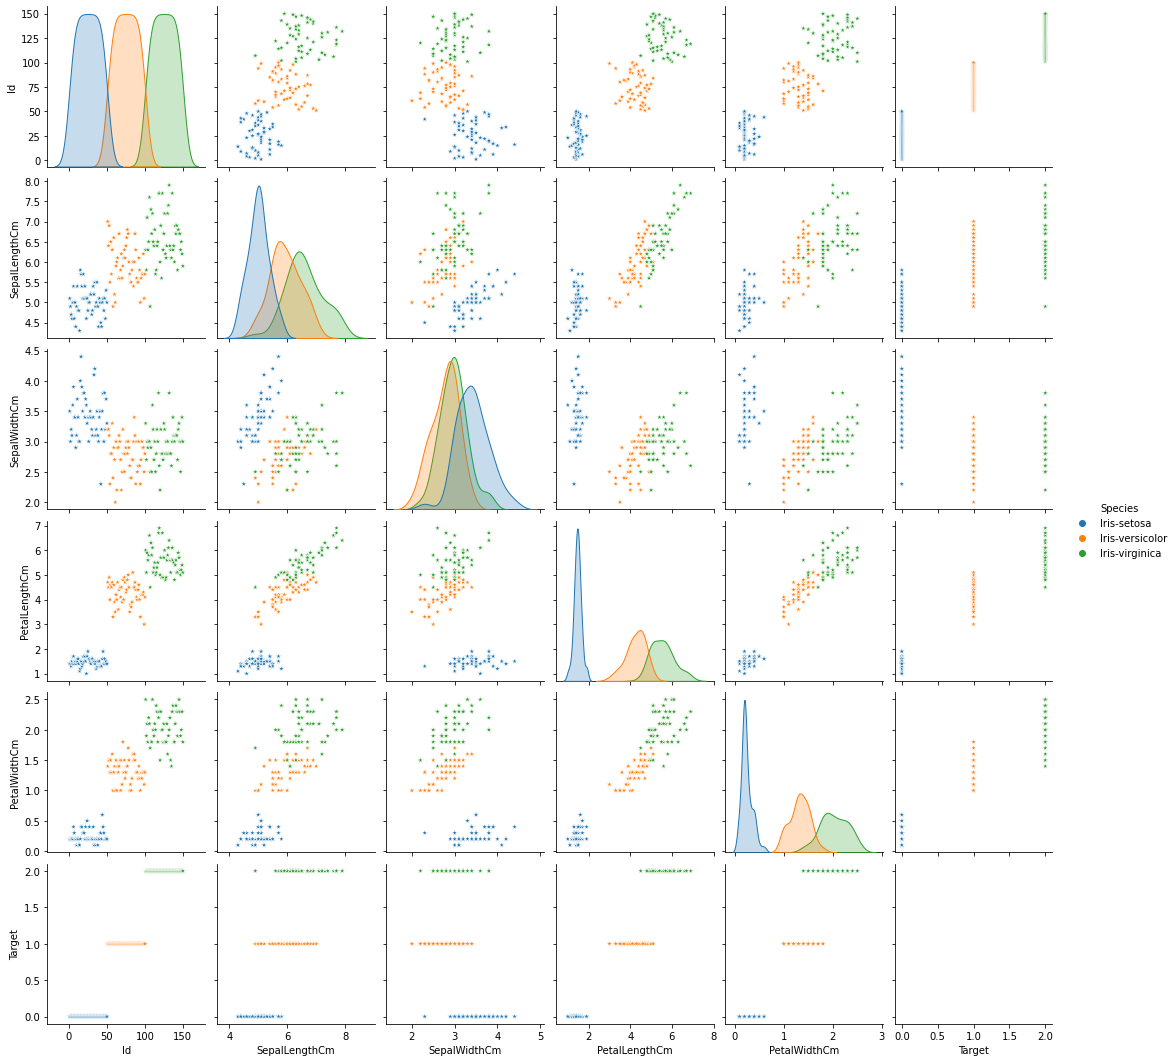

In [14]:
sns.pairplot(df , hue= 'Species', markers='*')

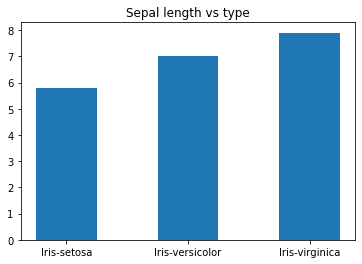

In [15]:
plt.bar(df['Species'],df['SepalLengthCm'],width=0.5)
plt.title('Sepal length vs type')
plt.show()

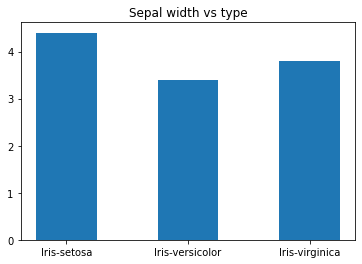

In [16]:
plt.bar(df['Species'],df['SepalWidthCm'],width=0.5)
plt.title('Sepal width vs type')
plt.show()

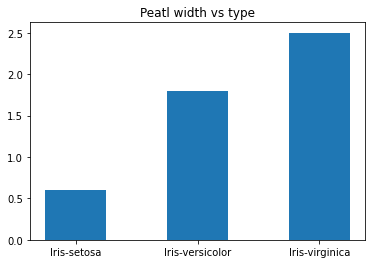

In [17]:
plt.bar(df['Species'],df['PetalWidthCm'],width=0.5)
plt.title('Peatl width vs type')
plt.show()

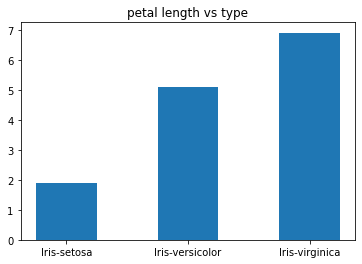

In [18]:
plt.bar(df['Species'],df['PetalLengthCm'],width=0.5)
plt.title('petal length vs type')
plt.show()

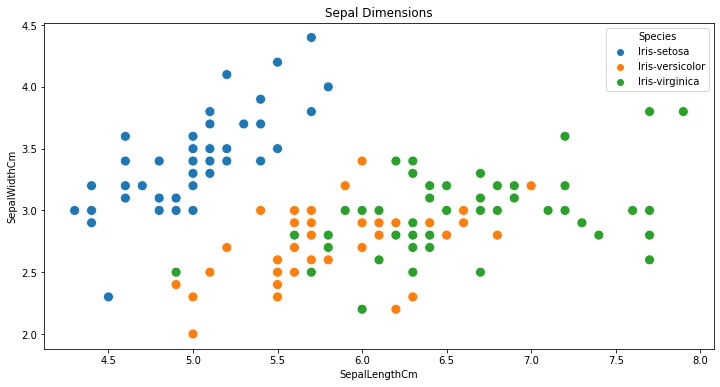

In [22]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=df.SepalLengthCm,y=df.SepalWidthCm,hue=df.Species, s=100);


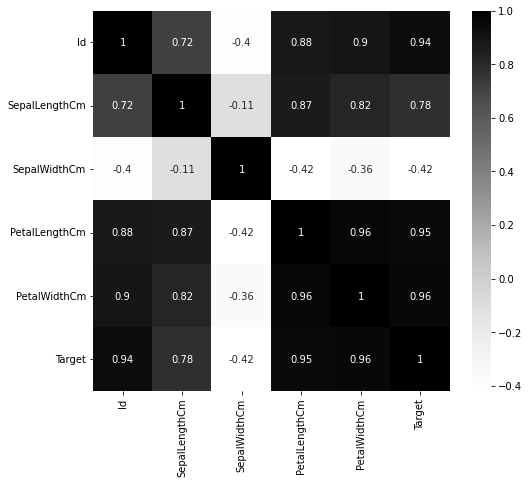

In [25]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot = True,cmap='Greys')
plt.show()

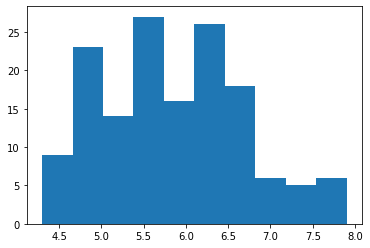

In [27]:
plt.hist(df.SepalLengthCm);

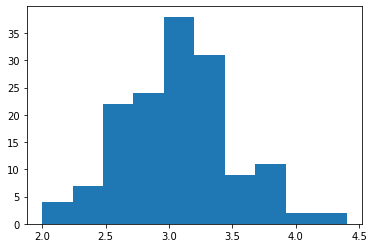

In [29]:
plt.hist(df.SepalWidthCm);

In [30]:
setosa_df = df[df.Species == 'Iris-setosa']
versicolor_df = df[df.Species == 'Iris-versicolor']
virginica_df = df[df.Species == 'Iris-virginica']

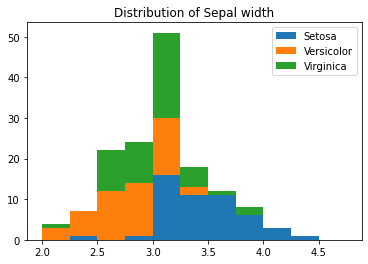

In [35]:
plt.title('Distribution of Sepal width')
plt.hist([setosa_df.SepalWidthCm, versicolor_df.SepalWidthCm,virginica_df.SepalWidthCm],bins=np.arange(2,5,0.25),stacked=True);
plt.legend(['Setosa','Versicolor','Virginica']);

In [36]:
x=df.drop(columns='Species')
y=df['Species']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y , test_size=0.4, random_state=1)

In [58]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
11,12,4.8,3.4,1.6,0.2,0
113,114,5.7,2.5,5.0,2.0,2
123,124,6.3,2.7,4.9,1.8,2
12,13,4.8,3.0,1.4,0.1,0
2,3,4.7,3.2,1.3,0.2,0


In [59]:
y_train.head()


11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [60]:
x_test.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
14,15,5.8,4.0,1.2,0.2,0
98,99,5.1,2.5,3.0,1.1,1
75,76,6.6,3.0,4.4,1.4,1
16,17,5.4,3.9,1.3,0.4,0
131,132,7.9,3.8,6.4,2.0,2


In [61]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [62]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

x_train:  90
x_test:  60
y_train:  90
y_test:  60


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [64]:
model= LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [66]:
predict=model.predict(x_test)
print('Prdicted value of the test model',predict)

Prdicted value of the test model ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Ir

In [67]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

In [68]:
print('training accuracy:',accuracy_score(y_train,y_train_pred))
print('testing accuracy:',accuracy_score(y_test,y_test_pred))

training accuracy: 1.0
testing accuracy: 1.0


In [69]:
y_pred = model.predict(x_test)

In [72]:
probs_y=model.predict_proba(x_test)
probs_y=np.round(prob_y,2)

In [73]:
result = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test_pred", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
result += "-"*65+"\n"
result += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test_pred, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
result += "\n"+"-"*65+"\n"
print(result)

y_test_pred | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-versicolor | Iris-versicolor | 0.0        | 0.71          | 0.29      
Iris-versicolor | Iris-versicolor | 0.0        | 1.0           | 0.0       
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-versicolor | Iris-versicolor | 0.04       | 0.96          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-setosa | Iris-setosa | 0.98       | 0.02          | 0.0       
Iris-setosa | Iris-setosa | 0.99       | 0.01          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.0           | 1.0       
Iris-versicolor | Iris-versicolor | 0.0        | 0.91          | 0.09      
Iris-setosa | Iris-setosa | 1.0        | 0.0           | 0.0       

In [74]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[19  0  0]
 [ 0 21  0]
 [ 0  0 20]]


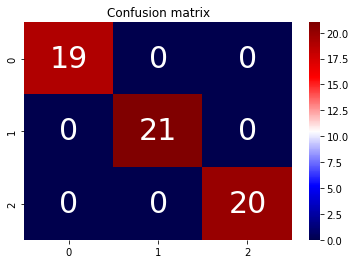

In [76]:
axes=plt.axes()
conf_mat_df= conf_mat
sns.heatmap(conf_mat_df,annot=True,annot_kws={'size': 30},fmt='d',cmap='seismic',ax=axes)
axes.set_title('Confusion matrix')
plt.show()

In [78]:
x=df.drop(['Id','Species','Target'],axis=1)
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.13,random_state=101)


In [80]:
model= DecisionTreeClassifier(max_depth=4,max_features='auto')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto')

In [81]:
y_pred=model.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.95

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


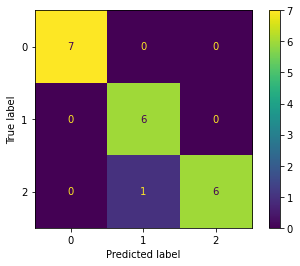

In [83]:
plot_confusion_matrix(model,x_test,y_test)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92         6
           2       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



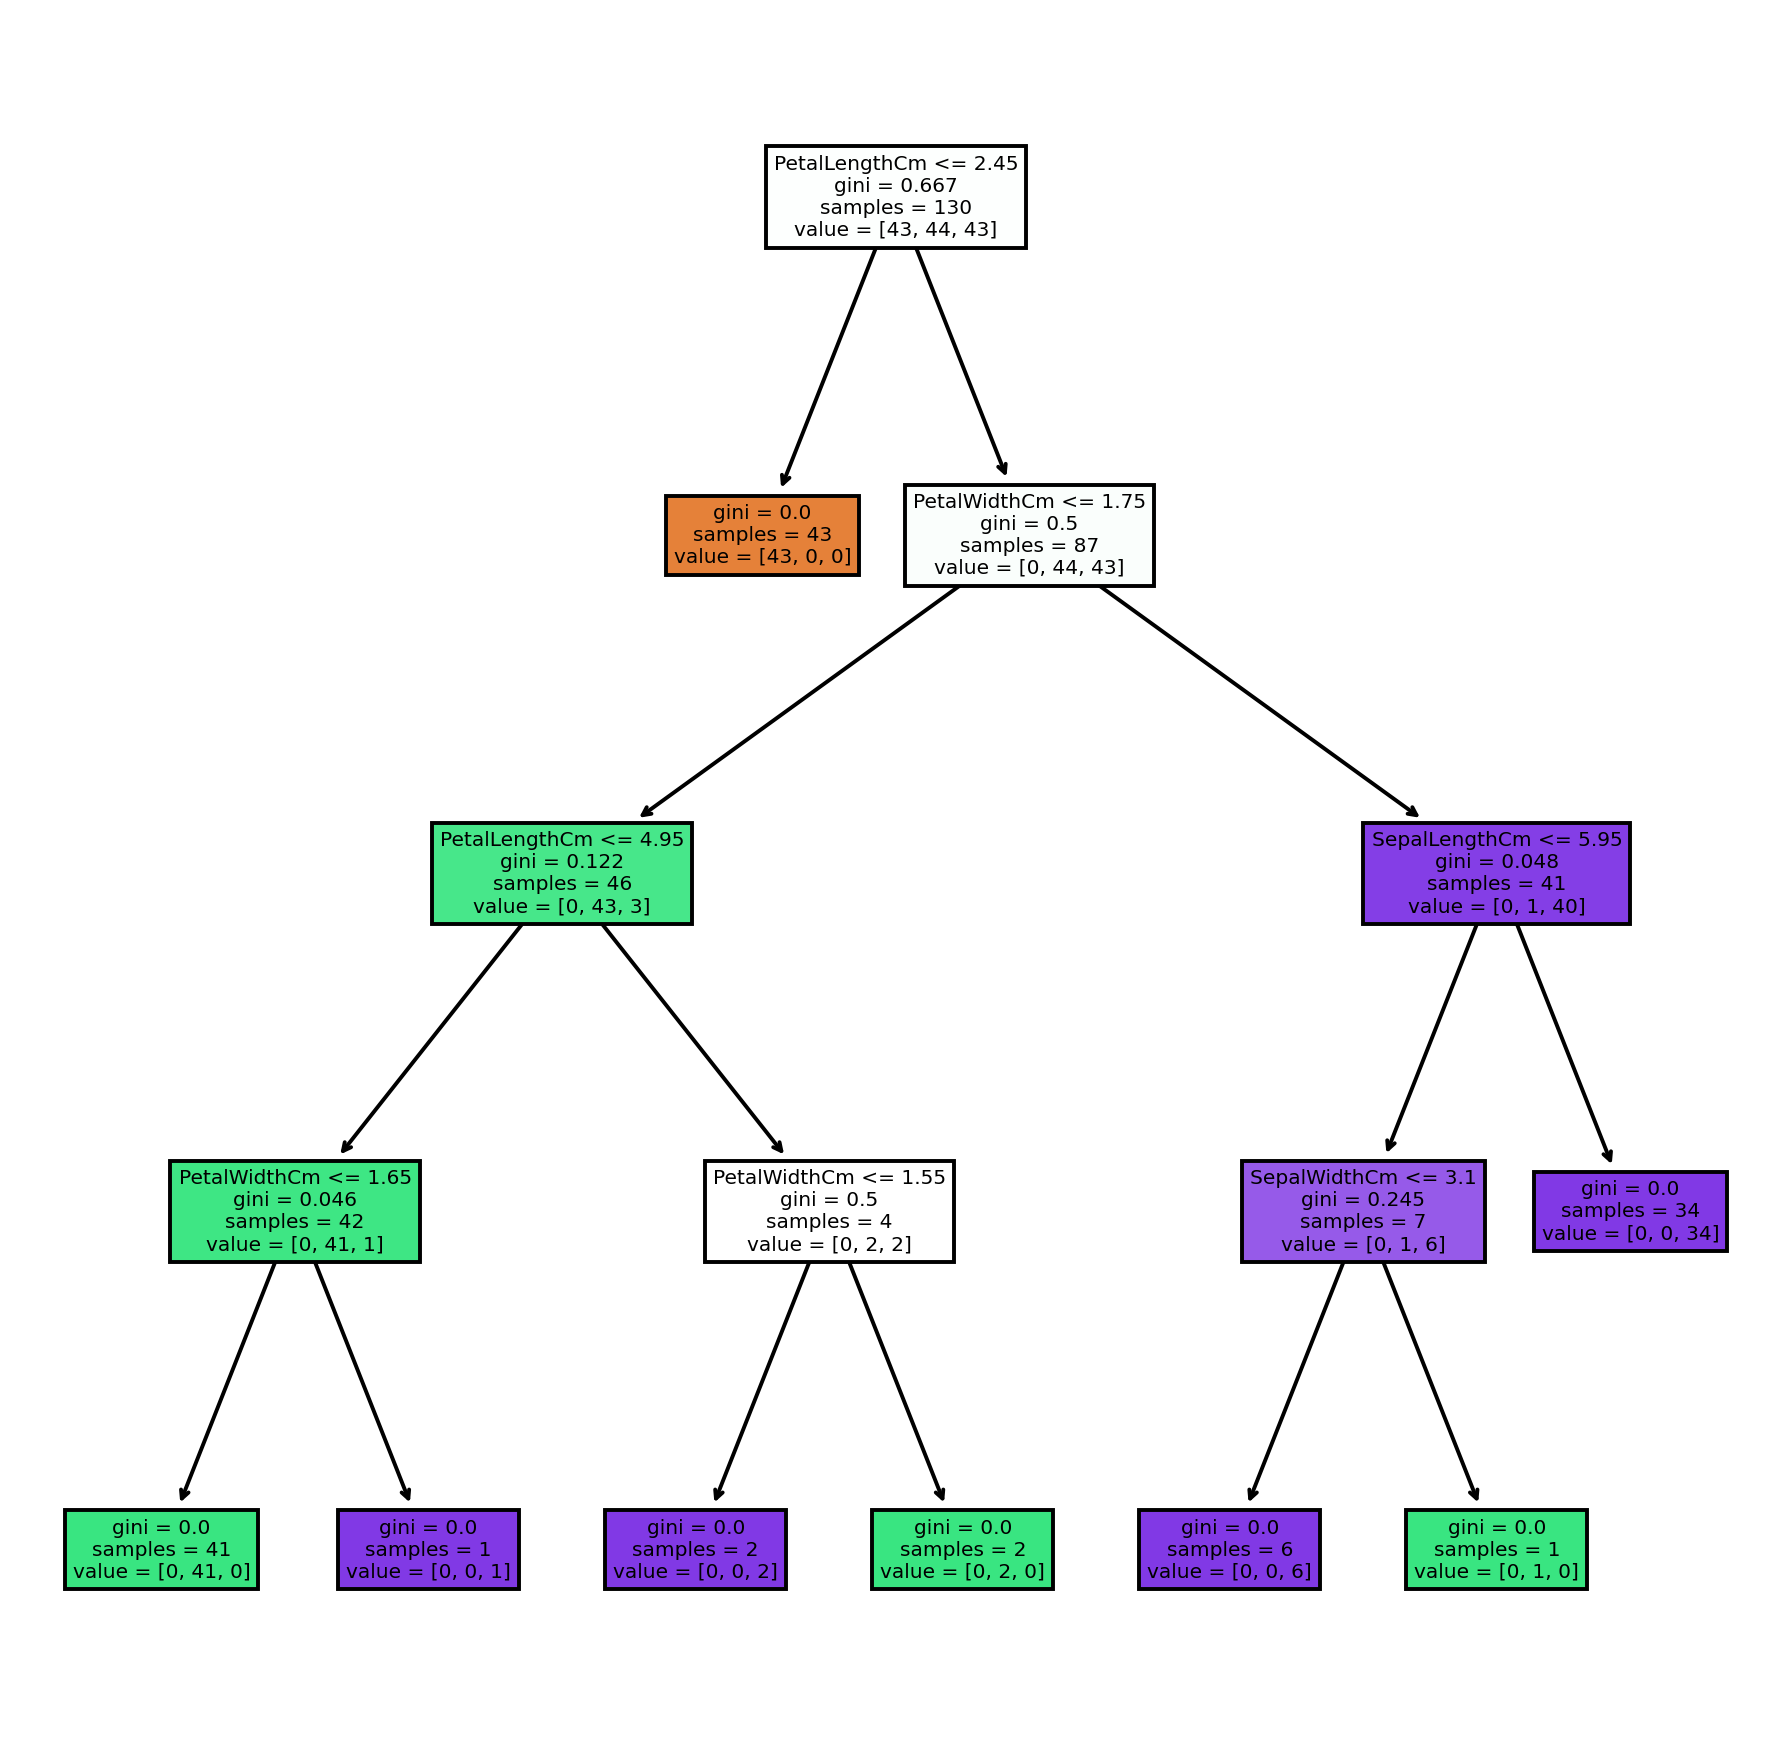

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8),dpi=280)
plot_tree(model,filled=True,feature_names=x.columns);

In [103]:
y_pred2 = model.predict([[5.6,7,8,6]])

if y_pred2==[0]:
  print('Iris-setosa')
elif y_pred2==[1]:
  print('Iris-versicolor')
else:
  print('Iris-virginica')

Iris-versicolor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
